In [1]:
# 参考
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
NUMS = 100000

In [5]:
class BanditArm:
    def __init__(self, m):
        self.m = m
        self.m_estimate = 0.0
        self.N = 0.0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.m_estimate = ((self.N - 1) * self.m_estimate + x) / self.N
        
def experiment(means, EPS, N):
    bandits = [BanditArm(mean) for mean in means]
    
    true_best = np.argmax(np.array(means))
    count_suboptimal = 0
    
    data = np.zeros(N)
    
    for i in range(N):

        if np.random.random() < EPS:
            j = random.choice(np.arange(len(bandits)))
        else:
            j = np.argmax([b.m_estimate for b in bandits])

        if j != true_best:
            count_suboptimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    for mean in means:
        plt.plot(np.ones(N)*mean)
    plt.xscale('log')
    plt.show()
  
    for idx, b in enumerate(bandits):
        print("mean estimate:", b.m_estimate, 'actual mean', means[idx])
  
    print("percent suboptimal for epsilon = %s:" % EPS, float(count_suboptimal) / N)
  
    return cumulative_average

~~~~~~~~~~ max means 9.504185814820783 ~~~~~~~~~~


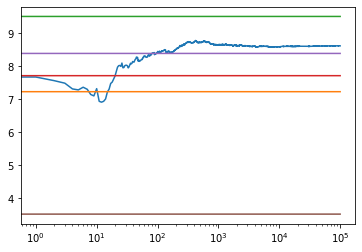

mean estimate: 7.230094588563599 actual mean 7.22373313071094
mean estimate: 9.515358879394768 actual mean 9.504185814820783
mean estimate: 7.721111752643705 actual mean 7.708928428928626
mean estimate: 8.392573490958322 actual mean 8.383211130477045
mean estimate: 3.505452228268939 actual mean 3.5130459499306887
percent suboptimal for epsilon = 0.4: 0.32171


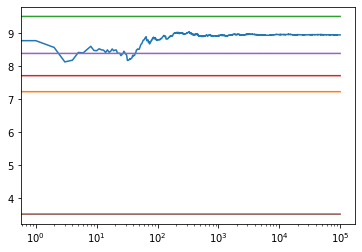

mean estimate: 7.20747158682575 actual mean 7.22373313071094
mean estimate: 9.503055816690951 actual mean 9.504185814820783
mean estimate: 7.7189297876800955 actual mean 7.708928428928626
mean estimate: 8.400882079337618 actual mean 8.383211130477045
mean estimate: 3.501484720951638 actual mean 3.5130459499306887
percent suboptimal for epsilon = 0.25: 0.20089


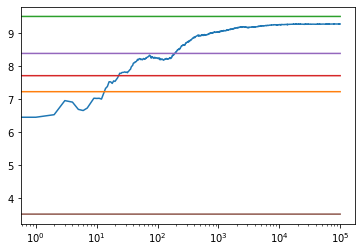

mean estimate: 7.186974370940959 actual mean 7.22373313071094
mean estimate: 9.504188939461772 actual mean 9.504185814820783
mean estimate: 7.666254154191232 actual mean 7.708928428928626
mean estimate: 8.394446347620088 actual mean 8.383211130477045
mean estimate: 3.532012659688516 actual mean 3.5130459499306887
percent suboptimal for epsilon = 0.1: 0.0812


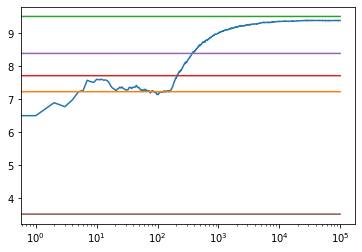

mean estimate: 7.258943143420393 actual mean 7.22373313071094
mean estimate: 9.498563415001327 actual mean 9.504185814820783
mean estimate: 7.700596729537054 actual mean 7.708928428928626
mean estimate: 8.372675364212629 actual mean 8.383211130477045
mean estimate: 3.508821270501774 actual mean 3.5130459499306887
percent suboptimal for epsilon = 0.05: 0.04197


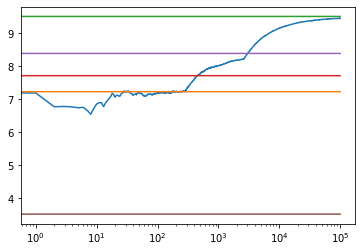

mean estimate: 7.231321381255957 actual mean 7.22373313071094
mean estimate: 9.50275961012646 actual mean 9.504185814820783
mean estimate: 7.845690213835158 actual mean 7.708928428928626
mean estimate: 8.354038518409443 actual mean 8.383211130477045
mean estimate: 3.5293416481195505 actual mean 3.5130459499306887
percent suboptimal for epsilon = 0.01: 0.03426


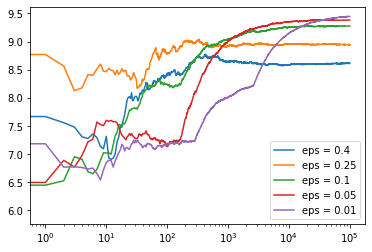

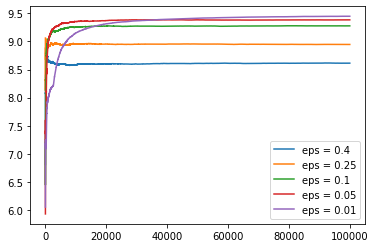

In [6]:
bandit_nums = len(BANDIT_PROBABILITIES)

means = [10 * np.random.random()  for i in np.arange(bandit_nums)]
print('~' * 10, 'max means', np.max(means), '~' * 10)

c_4 = experiment(means, 0.4, NUMS)
c_25 = experiment(means, 0.25, NUMS)
c_1 = experiment(means, 0.1, NUMS)
c_05 = experiment(means, 0.05, NUMS)
c_01 = experiment(means, 0.01, NUMS)

# log scale plot
plt.plot(c_4, label='eps = 0.4')
plt.plot(c_25, label='eps = 0.25')
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()


# linear plot
plt.plot(c_4, label='eps = 0.4')
plt.plot(c_25, label='eps = 0.25')
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()

In [7]:
# EPSが大きいと早く収束するが理論値まで到達せず、EPSが小さいと収束は遅いが理論値まで到達すると主張されている
# -> その通りとなっていない